<a href="https://colab.research.google.com/github/vishnudk/liver-disease-classifier/blob/master/indian_liver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix 
# from sklearn.cross_validation import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [0]:
data=pd.read_csv("indian_liver_patient.csv")

In [0]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [0]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [0]:
data.Gender=data.Gender.replace('Female',0)
data.Gender=data['Gender'].replace('Male',1)

In [0]:
data=standardise(data)
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.722222,0.0,0.009333,0.005076,0.088626,0.0080,0.003652,0.708333,0.600000,0.321429,0.5
1,0.688889,1.0,0.145333,0.279188,0.331280,0.0320,0.020288,0.781250,0.581818,0.264286,0.5
2,0.688889,1.0,0.097333,0.208122,0.232227,0.0300,0.013796,0.729167,0.600000,0.317857,0.5
3,0.644444,1.0,0.013333,0.020305,0.086256,0.0070,0.004058,0.708333,0.618182,0.357143,0.5
4,0.800000,1.0,0.052000,0.101523,0.092417,0.0135,0.011970,0.760417,0.436364,0.142857,0.5


In [0]:
def standardise(data_set):
  columnNames=list(data_set)
  for name in columnNames:
    data_set[name]=data_set[name]/max(data_set[name])
  return data_set

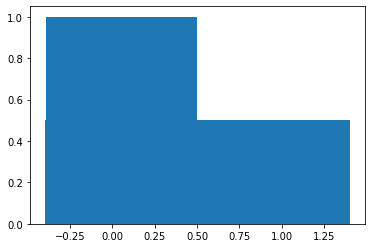

In [0]:
plt.bar(data['Total_Bilirubin'],data['Dataset'])
plt.show()

In [0]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null float64
Gender                        583 non-null float64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null float64
Alamine_Aminotransferase      583 non-null float64
Aspartate_Aminotransferase    583 non-null float64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null float64
dtypes: float64(11)
memory usage: 50.2 KB


In [0]:
dataDescription=data.describe()
dataDescription

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,0.497179,0.756432,0.043984,0.075437,0.137714,0.040357,0.022299,0.675332,0.571246,0.338237,0.643225
std,0.179887,0.429603,0.082794,0.142563,0.115136,0.091310,0.058616,0.113068,0.144640,0.114140,0.226245
min,0.044444,0.000000,0.005333,0.005076,0.029858,0.005000,0.002029,0.281250,0.163636,0.107143,0.500000
25%,0.366667,1.000000,0.010667,0.010152,0.083175,0.011500,0.005072,0.604167,0.472727,0.250000,0.500000
50%,0.500000,1.000000,0.013333,0.015228,0.098578,0.017500,0.008521,0.687500,0.563636,0.332143,0.500000
75%,0.644444,1.000000,0.034667,0.065990,0.141232,0.030250,0.017651,0.750000,0.690909,0.392857,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:
def removeNull(dataSet):
  dataDescription=data.describe()
  columnName=list(dataSet)
  for name in columnName:
      dataSet[name]=dataSet[name].replace(np.NaN,dataSet[name].mean())
  return dataSet

In [0]:
data=removeNull(data)
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
dtype: int64

In [0]:
# Create simulated datset in Python:
# rs = np.random.RandomState(0)
df = pd.DataFrame(data)
# Create and print correlation matrix:
corr = df.corr()

# 'RdBu_r' & 'BrBG' are other good diverging colormaps
corr.style.background_gradient(cmap='coolwarm')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Age,1,0.0565603,0.0117627,0.00752914,0.0804246,-0.0868828,-0.0199099,-0.187461,-0.265924,-0.216089
Gender,0.0565603,1,0.0892908,0.100436,-0.0274962,0.0823322,0.0803362,-0.089121,-0.0937993,-0.00340381
Total_Bilirubin,0.0117627,0.0892908,1,0.874618,0.206669,0.214065,0.237831,-0.00809934,-0.22225,-0.206159
Direct_Bilirubin,0.00752914,0.100436,0.874618,1,0.234939,0.233894,0.257544,-0.000138741,-0.228531,-0.200004
Alkaline_Phosphotase,0.0804246,-0.0274962,0.206669,0.234939,1,0.12568,0.167196,-0.0285144,-0.165453,-0.23396
Alamine_Aminotransferase,-0.0868828,0.0823322,0.214065,0.233894,0.12568,1,0.791966,-0.0425182,-0.0297417,-0.0023741
Aspartate_Aminotransferase,-0.0199099,0.0803362,0.237831,0.257544,0.167196,0.791966,1,-0.0256454,-0.0852903,-0.0700238
Total_Protiens,-0.187461,-0.089121,-0.00809934,-0.000138741,-0.0285144,-0.0425182,-0.0256454,1,0.784053,0.233904
Albumin,-0.265924,-0.0937993,-0.22225,-0.228531,-0.165453,-0.0297417,-0.0852903,0.784053,1,0.686322
Albumin_and_Globulin_Ratio,-0.216089,-0.00340381,-0.206159,-0.200004,-0.23396,-0.0023741,-0.0700238,0.233904,0.686322,1


In [0]:
# data.pop('Direct_Bilirubin')

In [0]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.722222,0.0,0.009333,0.005076,0.088626,0.0080,0.003652,0.708333,0.600000,0.321429
1,0.688889,1.0,0.145333,0.279188,0.331280,0.0320,0.020288,0.781250,0.581818,0.264286
2,0.688889,1.0,0.097333,0.208122,0.232227,0.0300,0.013796,0.729167,0.600000,0.317857
3,0.644444,1.0,0.013333,0.020305,0.086256,0.0070,0.004058,0.708333,0.618182,0.357143
4,0.800000,1.0,0.052000,0.101523,0.092417,0.0135,0.011970,0.760417,0.436364,0.142857


In [0]:
yData=data.pop('Dataset')
yData.head()
y_data=yData
x_data=data

KeyError: ignored

In [0]:
x_data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,0.722222,0.0,0.009333,0.005076,0.088626,0.0080,0.003652,0.708333,0.600000,0.321429
1,0.688889,1.0,0.145333,0.279188,0.331280,0.0320,0.020288,0.781250,0.581818,0.264286
2,0.688889,1.0,0.097333,0.208122,0.232227,0.0300,0.013796,0.729167,0.600000,0.317857
3,0.644444,1.0,0.013333,0.020305,0.086256,0.0070,0.004058,0.708333,0.618182,0.357143
4,0.800000,1.0,0.052000,0.101523,0.092417,0.0135,0.011970,0.760417,0.436364,0.142857


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=21)

In [0]:
X_train.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
349,0.544444,0.0,0.010667,0.010152,0.074882,0.0095,0.003043,0.687500,0.654545,0.428571
204,0.233333,1.0,0.009333,0.010152,0.063981,0.0135,0.005275,0.666667,0.600000,0.357143
347,0.422222,1.0,0.009333,0.010152,0.102370,0.1745,0.021302,0.729167,0.636364,0.357143
141,0.733333,0.0,0.056000,0.106599,0.075355,0.0075,0.006086,0.739583,0.400000,0.142857
175,0.344444,1.0,0.010667,0.010152,0.093839,0.0215,0.006289,0.760417,0.727273,0.428571


In [0]:
y_train=(y_train*2)-1
y_train.head()
y_test=(y_test*2)-1

In [0]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 120,max_features=2, min_samples_leaf=2,min_weight_fraction_leaf=.11) 
clf_entropy = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 120, max_features=5,
             min_samples_leaf =21108) 

In [0]:
clf_gini.fit(X_train,y_train)
y_pred = clf_gini.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

74.85714285714286


In [0]:
clf_entropy.fit(X_train, y_train)
y_pred1 = clf_entropy.predict(X_test)
print(accuracy_score(y_test,y_pred1)*100) 

78.28571428571428


In [0]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=11)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [0]:
pred=neigh.predict(X_test)
print(accuracy_score(y_test,pred)*100)

72.0
